## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Understanding

Mengambil Data dari Google drive: Menggunakan library gdown untuk mendownload dataset movie yang berisi list film dan rating pengguna.

In [2]:
# Download file ZIP dari Google Drive
file_id = "1LGWOVE41B7P_tnyUXzRaHikiZbJmJj-a"  # Ganti dengan ID file ZIP Anda
url = f"https://drive.google.com/uc?id={file_id}"
output_zip = "dataset.zip"

gdown.download(url, output_zip, quiet=False)

# Ekstrak file ZIP
output_folder = "datasets"
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Cek file yang diekstrak
print("Files extracted:")
for file_name in os.listdir(output_folder):
    print(file_name)

Downloading...
From (original): https://drive.google.com/uc?id=1LGWOVE41B7P_tnyUXzRaHikiZbJmJj-a
From (redirected): https://drive.google.com/uc?id=1LGWOVE41B7P_tnyUXzRaHikiZbJmJj-a&confirm=t&uuid=24b6bb4c-0512-43a1-b5d4-50310f5b360b
To: /content/dataset.zip
100%|██████████| 173M/173M [00:05<00:00, 32.9MB/s]


Files extracted:
movies.csv
ratings.csv


Melihat isi dari movies dan ratings

In [3]:
# Tentukan path untuk masing-masing file CSV
movies = os.path.join(output_folder, "movies.csv")
ratings = os.path.join(output_folder, "ratings.csv")

# Baca dataset dari file CSV
movies_data = pd.read_csv(movies)
ratings_data = pd.read_csv(ratings)

# Tampilkan beberapa baris pertama dari salah satu dataset
print("Movies Dataset:")
display(movies_data.head())

print("\nRatings Dataset:")
display(ratings_data.head())


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Mengecek mising value pada data

In [4]:
print("Movies Dataset:")
display(movies_data.isnull().sum())

print("\nRatings Dataset:")
display(ratings_data.isnull().sum())

Movies Dataset:


,0
movieId,0
title,0
genres,0



Ratings Dataset:


,0
userId,0
movieId,0
rating,0
timestamp,0


Mengecek duplikat data

In [5]:
print("Movies Dataset:")
display(movies_data.duplicated().sum())

print("\nRatings Dataset:")
display(ratings_data.duplicated().sum())

Movies Dataset:


0


Ratings Dataset:


0

Mengecek detail data movies dan ratings

In [6]:
print("Movies Dataset:")
display(movies_data.info())

print("\nRatings Dataset:")
display(ratings_data.info())

Movies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


None


Ratings Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


None

Mengecek dan menampilkan daftar film dan genre

In [7]:
print('Jumlah film: ', len(movies_data.movieId.unique()))
print('Judul Film: ', movies_data.title.unique())

# Pecah genres berdasarkan '|'
all_genres = movies_data['genres'].str.split('|').explode()

# Hitung jumlah genres unik
unique_genres = all_genres.unique()
print('\nJumlah genres: ', len(unique_genres))

# Tampilkan genres unik
print('Daftar genres: ', unique_genres)


Jumlah film:  62423
Judul Film:  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Bad Poems (2018)' 'A Girl Thing (2001)' "Women of Devil's Island (1962)"]

Jumlah genres:  20
Daftar genres:  ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


Mengecek jumlah user, rating, dan jumlah film yang diberikan rating

In [8]:
print('Jumlah user: ', len(ratings_data.userId.unique()))
print('Jumlah data rating: ', len(ratings_data.rating))
print('Jumlah film: ', len(ratings_data.movieId.unique()))

Jumlah user:  162541
Jumlah data rating:  25000095
Jumlah film:  59047


Mengecek distribusi rating pada data

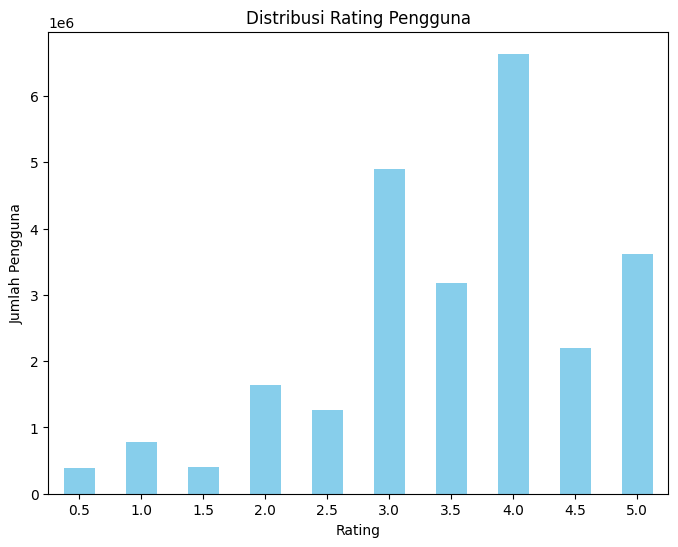

In [34]:
# Distribusi rating
plt.figure(figsize=(8, 6))
ratings_data['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.show()

Mengecek genre yang paling banyak muncul

Drama          25606
Comedy         16870
Thriller        8654
Romance         7719
Action          7348
Horror          5989
Documentary     5605
Crime           5319
Adventure       4145
Sci-Fi          3595
Name: count, dtype: int64


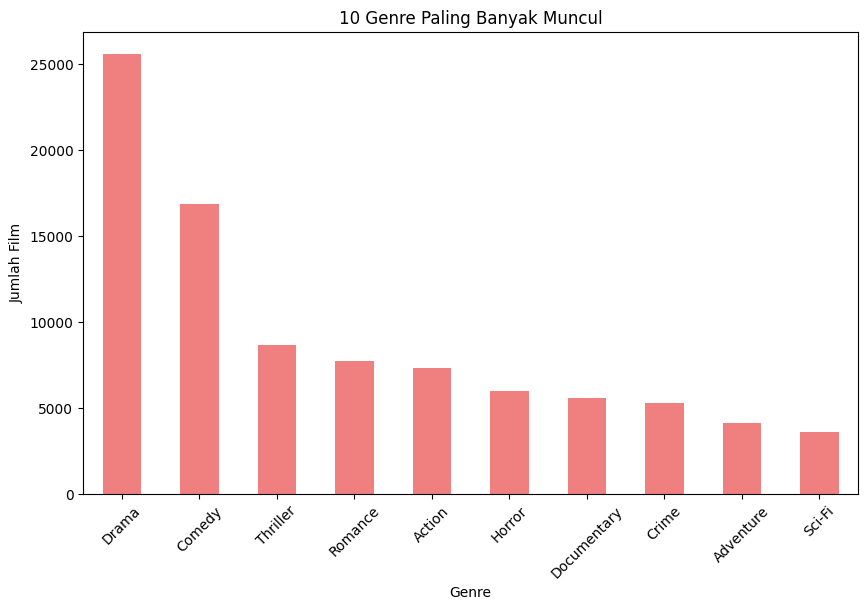

In [35]:
# Membagi genre yang dipisahkan oleh '|'
all_genres = movies_data['genres'].str.split('|', expand=True).stack().value_counts()

# Tampilkan 10 genre terbanyak
print(all_genres.head(10))

# Visualisasi 10 genre terbanyak
plt.figure(figsize=(10, 6))
all_genres.head(10).plot(kind='bar', color='lightcoral')
plt.title('10 Genre Paling Banyak Muncul')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.show()

## Data Preparation

Menghapus film yang tidak mempunyai genre atau 'no genres listed'

In [9]:
print("Jumlah data sebelum:", len(movies_data))
movies_data = movies_data[movies_data['genres'] != '(no genres listed)']
print("Jumlah data sesudah:", len(movies_data))

Jumlah data sebelum: 62423
Jumlah data sesudah: 57361


Dikarenakan ukuran dataset yang besar dan memory yang terbatas maka kita akan melakukan undersampling yaitu hanya mengambil beberapa sampel data sebanyak 10000 data secara acak

In [10]:
# Ambil 10.000 data dari Ratings Dataset
ratings_sampled = ratings_data.sample(n=10000, random_state=42)

print(f"Jumlah data rating setelah sampling: {len(ratings_sampled)}")
print(f"Jumlah user: {ratings_sampled['userId'].nunique()}")
print(f"Jumlah film: {ratings_sampled['movieId'].nunique()}")

Jumlah data rating setelah sampling: 10000
Jumlah user: 9041
Jumlah film: 3658


Sesuaikan data movie berdasarkan hasil undersampling dari rating_sampled

In [11]:
# Filter Movies Dataset berdasarkan movieId yang ada di ratings_sampled
sampled_movie_ids = ratings_sampled['movieId'].unique()
movies_sampled = movies_data[movies_data['movieId'].isin(sampled_movie_ids)]

print(f"Jumlah film setelah sampling: {len(movies_sampled)}")

Jumlah film setelah sampling: 3651


## Modeling

Selanjutnya adalah tahap modeling dimana kita menggunakan teknik Content-based Filtering dan Collaborative filtering, kemudian membandingkan hasilnya menggunakan metrik evaluasi RSME dan MAE

### Content-Based Filtering

Memisahkan genre menjadi format yang bisa diolah

In [12]:
movies_sampled['genres'] = movies_sampled['genres'].str.split('|')

<ipython-input-12-b78a30fb3799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_sampled['genres'] = movies_sampled['genres'].str.split('|')


Gabungkan genres menjadi string tunggal untuk setiap film, kemudian Konversi genres ke dalam bentuk vektor TF-IDF

In [13]:
movies_sampled['genres_str'] = movies_sampled['genres'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies_sampled['genres_str'])

<ipython-input-13-1de0ef815bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_sampled['genres_str'] = movies_sampled['genres'].apply(lambda x: ' '.join(x))


Menghitung similarity antara film berdasarkan genre

In [14]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Membuat fungsi recommend_movies untuk mencari film-film yang memiliki genre paling mirip dengan film yang diberikan sebagai input (dalam contoh ini, "Toy Story (1995)")

In [15]:
def recommend_movies(title, cosine_sim=cosine_sim):
    # Dapatkan indeks film berdasarkan judul
    idx = movies_sampled[movies_sampled['title'] == title].index[0]

    # Dapatkan skor similarity untuk semua film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan film berdasarkan skor similarity tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil 10 film teratas selain film itu sendiri
    sim_scores = sim_scores[1:11]

    # Dapatkan judul, genre, dan skor similarity dari indeks
    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = movies_sampled.iloc[movie_indices].copy()
    recommended_movies['similarity_score'] = [i[1] for i in sim_scores]

    return pd.DataFrame(recommended_movies[['movieId', 'title', 'genres', 'similarity_score']])

df_recommendations = recommend_movies('Toy Story (1995)')
df_recommendations

,movieId,title,genres,similarity_score
2203,2294,Antz (1998),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0
3021,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0
3912,4016,"Emperor's New Groove, The (2000)","[Adventure, Animation, Children, Comedy, Fantasy]",1.0
4780,4886,"Monsters, Inc. (2001)","[Adventure, Animation, Children, Comedy, Fantasy]",1.0
11604,53121,Shrek the Third (2007),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0
12969,65577,"Tale of Despereaux, The (2008)","[Adventure, Animation, Children, Comedy, Fantasy]",1.0
17431,91355,Asterix and the Vikings (Astérix et les Viking...,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0
22353,114552,"Boxtrolls, The (2014)","[Adventure, Animation, Children, Comedy, Fantasy]",1.0
30348,136016,The Good Dinosaur (2015),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0
43614,166461,Moana (2016),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0


### Collaborative Filtering

Assign ratings_sampled ke variabel df

In [16]:
df = ratings_sampled
df

,userId,movieId,rating,timestamp
15347762,99476,104374,3.5,1467897440
16647840,107979,2634,4.0,994007728
23915192,155372,1614,3.0,1097887531
10052313,65225,7153,4.0,1201382275
12214125,79161,500,5.0,1488915363
...,...,...,...,...
24678512,160362,80463,3.0,1352066370
11535385,74795,349,4.0,941763956
7244456,46974,4886,5.0,1474324986
15783630,102231,122906,3.0,1571675709


In [17]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [99476, 107979, 155372, 65225, 79161, 105342, 68169, 21378, 133938, 151798, 148300, 116498, 148324, 87735, 89910, 121214, 155715, 154793, 45394, 71952, 156793, 138596, 25474, 126001, 65274, 122955, 8775, 122803, 84055, 28436, 144139, 92366, 76183, 27171, 98776, 117106, 47496, 151537, 117415, 30915, 114062, 55386, 86723, 30017, 20040, 146376, 29664, 120986, 151734, 29347, 42785, 93784, 82983, 119067, 110364, 59943, 6713, 35327, 94219, 111072, 138575, 36671, 1535, 76766, 15315, 57432, 135038, 57477, 61809, 121380, 49853, 5376, 1553, 48672, 82541, 111887, 129817, 48133, 140224, 97576, 38562, 142380, 84467, 75558, 67799, 95169, 157719, 139294, 80809, 95416, 63184, 108053, 152597, 22771, 15553, 112225, 102158, 15794, 50659, 25506, 146060, 148265, 58555, 23267, 135241, 45693, 13551, 38369, 158964, 150690, 13011, 13570, 110622, 124443, 26985, 4909, 97566, 161492, 33952, 43984, 126670, 133083, 100260, 109175, 93884, 89054, 59122, 90020, 116321, 98503, 140569, 6729, 22418, 117221,

In [18]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [19]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [20]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

9041
3658
Number of User: 9041, Number of Movie: 3658, Min Rating: 0.5, Max Rating: 5.0


Mengacak dataset

In [21]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
2332797,15541,1240,4.0,1119093806,5851,359
9496674,61719,44191,5.0,1188268900,4469,1519
12940647,83787,26606,3.0,1205478874,1701,1222
19652600,127634,2353,2.0,1030651337,4522,604
8410983,54785,2019,5.0,1115079283,4327,200
...,...,...,...,...,...,...
22736601,147810,2927,3.0,1262066911,5390,2657
18354331,118865,2706,4.5,1058693496,4924,318
11047125,71839,2320,2.5,1366493484,633,2560
21757612,141460,1225,3.0,1076769760,853,690


In [22]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[5851  359]
 [4469 1519]
 [1701 1222]
 ...
 [ 633 2560]
 [ 853  690]
 [6740 3053]] [0.77777778 1.         0.55555556 ... 0.44444444 0.55555556 1.        ]


Membuat fungsi RecommenderNet, yang digunakan untuk rekomendasi berbasis Neural Collaborative Filtering (NCF) menggunakan TensorFlow

In [23]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Inisialisasi model

In [24]:
model = RecommenderNet(num_users, num_movie, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan training pada model

In [25]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6922 - root_mean_squared_error: 0.2925 - val_loss: 0.6853 - val_root_mean_squared_error: 0.2915
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6556 - root_mean_squared_error: 0.2623 - val_loss: 0.6803 - val_root_mean_squared_error: 0.2867
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6209 - root_mean_squared_error: 0.2237 - val_loss: 0.6792 - val_root_mean_squared_error: 0.2857
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6158 - root_mean_squared_error: 0.2193 - val_loss: 0.6772 - val_root_mean_squared_error: 0.2838
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6087 - root_mean_squared_error: 0.2149 - val_loss: 0.6753 - val_root_mean_squared_error: 0.2821
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6034 - root_mean_squared_error: 0.2053 - val_loss: 0.6732 - val_root_mean_squared_error: 0.2802
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

Menyiapkan data untuk memprediksi rekomendasi film bagi user tertentu

In [26]:
movie_df = movies_sampled
df = ratings_sampled

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]

movie_not_visited = movie_df[~movie_df['movieId'].isin(movie_visited_by_user.movieId.values)]['movieId']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)
print(user_movie_array)

[[ 770  280]
 [ 770  279]
 [ 770  192]
 ...
 [ 770  204]
 [ 770 2118]
 [ 770  322]]


Membuat prediksi top 10 rekomedasi film berdasarkan rating yang diberikan pengguna

In [27]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Showing recommendations for users: 120457
movie with high ratings from user
--------------------------------
Schindler's List (1993) : ['Drama', 'War']
Hot Shots! (1991) : ['Action', 'Comedy', 'Romance', 'War']
--------------------------------
Top 10 movie recommendation
--------------------------------
39 Steps, The (1935) : ['Drama', 'Mystery', 'Thriller']
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) : ['Action', 'Adventure', 'Western']
Stalker (1979) : ['Drama', 'Mystery', 'Sci-Fi']
Cool Hand Luke (1967) : ['Drama']
High Noon (1952) : ['Drama', 'Western']
Joy Luck Club, The (1993) : ['Drama', 'Romance']
Rocky (1976) : ['Drama']
Stepmom (1998) : ['Drama']
Risky Business (1983) : ['Comedy']
Last Unicorn, The (1982) : ['Animation', 'Children', 'Fantasy']


### Evaluasi

Melakukan evaluasi terhadap dua metode, yaitu Content-Based Filtering dan Collaborative Filtering, untuk menentukan model mana yang memberikan hasil rekomendasi terbaik.

In [32]:
# Skor similarity dari rekomendasi Content-Based Filtering
predicted_ratings = df_recommendations['similarity_score'].values

# Ambil rating aktual yang sesuai dengan film rekomendasi
actual_ratings = []
for movie_id in df_recommendations['movieId']:
    actual_rating = ratings_sampled[ratings_sampled['movieId'] == movie_id]['rating'].mean()  # Rata-rata rating jika ada lebih dari satu
    actual_ratings.append(actual_rating)

# Evaluasi Content-Based Filtering
mae_cb = mean_absolute_error(actual_ratings, predicted_ratings)
rmse_cb = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# Prediksi rating pada data uji untuk Collaborative Filtering
y_pred = model.predict(x_val).flatten()

# Evaluasi Collaborative Filtering
mae_cf = mean_absolute_error(y_val, y_pred)
rmse_cf = np.sqrt(mean_squared_error(y_val, y_pred))

# Hasil evaluasi
print(f"Content-Based Filtering - MAE: {mae_cb:.4f}, RMSE: {rmse_cb:.4f}")
print(f"Collaborative Filtering - MAE: {mae_cf:.4f}, RMSE: {rmse_cf:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Content-Based Filtering - MAE: 2.3357, RMSE: 2.5409
Collaborative Filtering - MAE: 0.2111, RMSE: 0.2613
